### Keras Basics

In [4]:
# pip install tensorflow

In [3]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Create a basic dataset that has a linear relationship 

In [6]:
m = 2
b = 3
x = np.linspace(0, 50, 100)

np.random.seed(101)
noise = np.random.normal(loc = 0, 
                         scale = 4,
                        size = len(x))

y = 2*x + b + noise

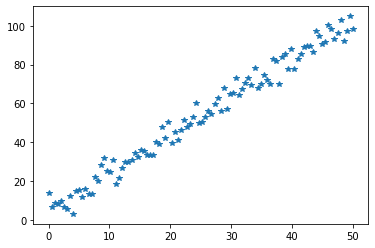

In [10]:
plt.plot(x, y, '*')

In [11]:
from keras.models import Sequential
from keras.layers import Dense

In [12]:
model = Sequential()

model.add(Dense(4, 
                input_dim = 1, 
                activation = "relu"))
model.add(Dense(4, 
                activation = "relu"))
model.add(Dense(1, 
                activation = "linear"))
model.compile(loss = "mse", 
              optimizer = "adam")

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 8         
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


#### Fit the Model to the Data

In [14]:
model.fit(x, y, epochs = 200)

Epoch 1/200
4/4 [==============================] - 1s 5ms/step - loss: 3710.4722
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 3707.0979
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 3703.2522
Epoch 4/200
4/4 [==============================] - 0s 4ms/step - loss: 3699.1060
Epoch 5/200
4/4 [==============================] - 0s 3ms/step - loss: 3694.5601
Epoch 6/200
4/4 [==============================] - 0s 4ms/step - loss: 3689.1104
Epoch 7/200
4/4 [==============================] - 0s 3ms/step - loss: 3683.2856
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 3676.3081
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 3669.2000
Epoch 10/200
4/4 [==============================] - 0s 4ms/step - loss: 3660.7771
Epoch 11/200
4/4 [==============================] - 0s 4ms/step - loss: 3651.8582
Epoch 12/200
4/4 [==============================] - 0s 3ms/step - loss: 3641.6040
Epoch 13/200
4/4 [=======

#### Loss vs. Epochs plot: How Loss is decreasing as we increase Epochs

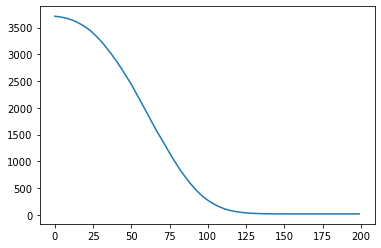

In [20]:
loss = model.history.history["loss"]
epochs = range(len(loss))

plt.plot(epochs, loss);

#### Generate Predictions

In [22]:
x_for_predictions = np.linspace(0, 50, 100)
x_for_predictions[:5]

array([0.        , 0.50505051, 1.01010101, 1.51515152, 2.02020202])

In [24]:
y_pred = model.predict(x_for_predictions)

4/4 [==============================] - 0s 2ms/step


#### Plotting the line of best fit

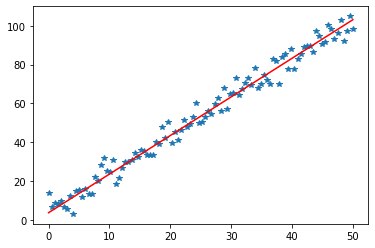

In [29]:
plt.plot(x, y, "*")
plt.plot(x_for_predictions, y_pred, "r")
# plt.plot(x_for_predictions, y_pred, "*")

In [31]:
from sklearn.metrics import mean_squared_error

#### Evaluating the model using MSE. This is just the same evaluation metrics that we used in defining the loss function 

In [32]:
mean_squared_error(y, y_pred)

17.050812311352352

## Keras and RNN Project

In [101]:
df = pd.read_csv("./UDEMY_TSA_FINAL/Data/Alcohol_Sales.csv",
                index_col = "DATE",
                parse_dates = True)
df.index.freq = "MS"
df.columns = ["Sales"]
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


<AxesSubplot:xlabel='DATE'>

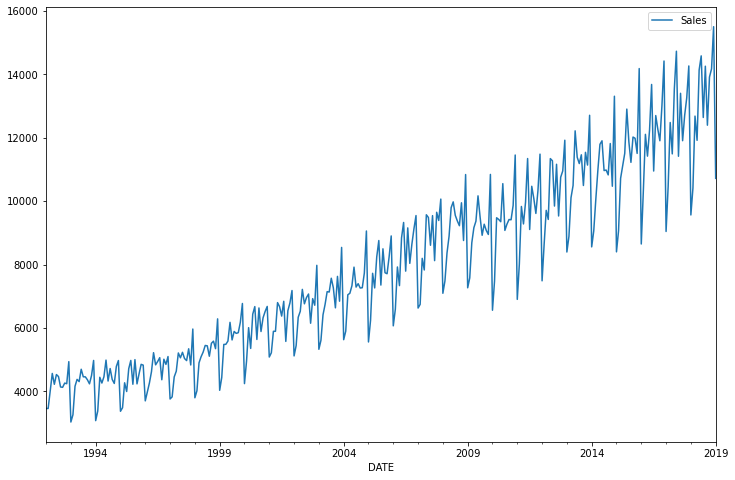

In [102]:
df.plot(figsize = (12, 8))

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [104]:
results = seasonal_decompose(df["Sales"])

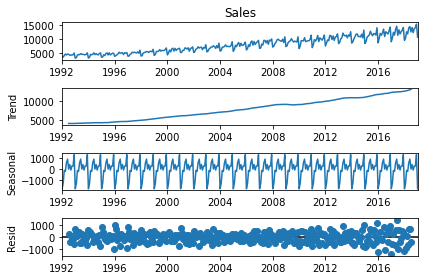

In [105]:
results.plot();

#### Train Test Split

In [106]:
len(df)

325

In [107]:
len(df) - 12

313

In [108]:
train = df.iloc[:313]
test = df.iloc[313: ]

In [109]:
len(test)

12

#### Scaling

In [111]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

MinMaxScaler()

In [113]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [114]:
scaled_train[:5]

array([[0.03658432],
       [0.03649885],
       [0.08299855],
       [0.13103684],
       [0.1017181 ]])

#### Time Series Generator

In [115]:
n_input = 3
n_features = 1
batch_size = 2
generator = TimeseriesGenerator(scaled_train, 
                                scaled_train,\
                               length = n_input,
                               batch_size = batch_size )

In [116]:
len(scaled_train)

313

In [117]:
len(generator)

155

In [118]:
X, y = generator[0]

#### Define the Inputs that we want - how long our training sequence should be

In [119]:
X

array([[[0.03658432],
        [0.03649885],
        [0.08299855]],

       [[0.03649885],
        [0.08299855],
        [0.13103684]]])

#### The next timestamp. The thing that we want to predict

In [120]:
y

array([[0.13103684],
       [0.1017181 ]])

In [121]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [122]:
n_input = 12
n_features = 1
batch_size = 2 

train_generator = TimeseriesGenerator(scaled_train, 
                                scaled_train,\
                               length = n_input,
                               batch_size = batch_size )

#### Creating the Model

In [123]:
model = Sequential()

model.add(LSTM(150, 
            activation = "relu",
              input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam",
             loss = "mse")

In [124]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 150)               91200     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


#### Fit the Model

In [125]:
model.fit_generator(train_generator,
                   epochs = 100)

Epoch 1/100


C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_11956/4254767159.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


151/151 [==============================] - 2s 6ms/step - loss: 0.0170
Epoch 2/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0099
Epoch 3/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0084
Epoch 4/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0099
Epoch 5/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0086
Epoch 6/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0088
Epoch 7/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0080
Epoch 8/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0070
Epoch 9/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0059
Epoch 10/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0052
Epoch 11/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0047
Epoch 12/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0035
Epoch 13/100
151/151 [===

#### Loss vs. Epochs plot: How Loss is decreasing as we increase Epochs

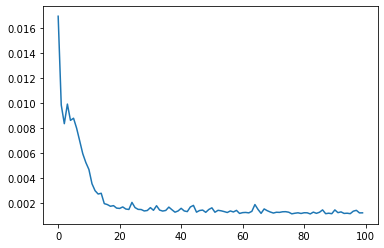

In [126]:
loss = model.history.history["loss"]
epochs = range(len(loss))

plt.plot(epochs, loss);

#### 12 history steps ---> step 13
#### Last 12 points train ---> pt 1 of test data

In [127]:
first_eval_batch = scaled_train[-12:]
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

#### Reshaping

In [128]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.63432772],
        [0.80776135],
        [0.72313873],
        [0.89870929],
        [1.        ],
        [0.71672793],
        [0.88648602],
        [0.75869732],
        [0.82742115],
        [0.87443371],
        [0.96025301],
        [0.5584238 ]]])

#### Use the reshaped version as an input to the model

In [129]:
model.predict(first_eval_batch)

1/1 [==============================] - 0s 194ms/step


array([[0.7274736]], dtype=float32)

In [130]:
model.predict(first_eval_batch)[0]

1/1 [==============================] - 0s 27ms/step


array([0.7274736], dtype=float32)

#### Forecast using RNN Model

In [131]:
test_predictions = []

#grabbing the last input values from the training set
first_eval_batch = scaled_train[-n_input:] 
#reshape this to the format RNN wants (same format as Timeseries Generator)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# how far into the future will I forecast?
#last n_input points from the training set
for i in range(len(test)):
    
    # One Timestep ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]
    
    #store that prediction
    test_predictions.append(current_pred)
    
    #UPDATE current batch to include prediction (current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)
    

1/1 [==============================] - 0s 21ms/step


In [132]:
test_predictions

[array([0.7274736], dtype=float32),
 array([0.8191962], dtype=float32),
 array([0.7919665], dtype=float32),
 array([0.95301956], dtype=float32),
 array([1.018783], dtype=float32),
 array([0.77506363], dtype=float32),
 array([0.93770087], dtype=float32),
 array([0.78823394], dtype=float32),
 array([0.88744575], dtype=float32),
 array([0.91033334], dtype=float32),
 array([0.99628675], dtype=float32),
 array([0.61302924], dtype=float32)]

#### Apply the scaling

In [133]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[11541.7138406 ],
       [12614.77662706],
       [12296.21605891],
       [14180.37582523],
       [14949.74200451],
       [12098.46945322],
       [14001.16245067],
       [12252.54881531],
       [13413.22780412],
       [13680.98969084],
       [14686.55868638],
       [10202.82909703]])

#### Combine the Test and Prediction into 1 dataframe

In [134]:
test["Predictions"] = true_predictions

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_11956/3424149773.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"] = true_predictions


#### Plot the Predictions vs. Test

<AxesSubplot:xlabel='DATE'>

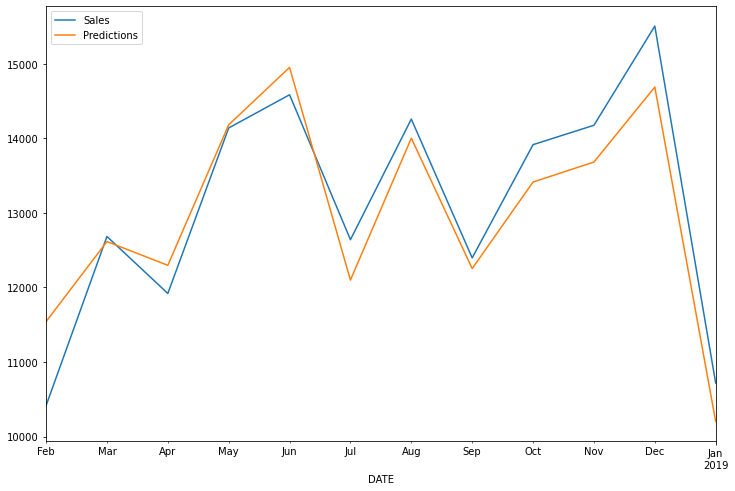

In [135]:
test.plot(figsize = (12, 8))

#### Saving and Loading Model using Keras

In [136]:
model.save("RNNModel_Forecasting.h5")

In [137]:
pwd

'C:\\Users\\Christian\\OneDrive - Polytechnic University of the Philippines\\Desktop\\Udemy - Time Series Analysis Course'

In [138]:
from keras.models import load_model

In [139]:
new_model = load_model("RNNModel_Forecasting.h5")
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 150)               91200     
                                                                 
 dense_5 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [140]:
test.index

DatetimeIndex(['2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01',
               '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01',
               '2018-10-01', '2018-11-01', '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='DATE', freq='MS')

#### Generate Predictions for the Future

In [143]:
future_predictions = []

#grabbing the last input values from the training set
first_eval_batch = scaled_train[-n_input:] 
#reshape this to the format RNN wants (same format as Timeseries Generator)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# how far into the future will I forecast?
#last n_input points from the training set
for i in range(12):
    
    # One Timestep ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]
    
    #store that prediction
    future_predictions.append(current_pred)
    
    #UPDATE current batch to include prediction (current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 22ms/step


In [144]:
future_predictions

[array([0.7274736], dtype=float32),
 array([0.8191962], dtype=float32),
 array([0.7919665], dtype=float32),
 array([0.95301956], dtype=float32),
 array([1.018783], dtype=float32),
 array([0.77506363], dtype=float32),
 array([0.93770087], dtype=float32),
 array([0.78823394], dtype=float32),
 array([0.88744575], dtype=float32),
 array([0.91033334], dtype=float32),
 array([0.99628675], dtype=float32),
 array([0.61302924], dtype=float32)]

#### Apply Scaling

In [145]:
true_future_predictions = scaler.inverse_transform(future_predictions)
true_future_predictions

array([[11541.7138406 ],
       [12614.77662706],
       [12296.21605891],
       [14180.37582523],
       [14949.74200451],
       [12098.46945322],
       [14001.16245067],
       [12252.54881531],
       [13413.22780412],
       [13680.98969084],
       [14686.55868638],
       [10202.82909703]])

In [155]:
FutureMonth_Index = pd.date_range(start="2019-02-01", end="2020-01-01", freq='MS')
FutureMonth_Index

DatetimeIndex(['2019-02-01', '2019-03-01', '2019-04-01', '2019-05-01',
               '2019-06-01', '2019-07-01', '2019-08-01', '2019-09-01',
               '2019-10-01', '2019-11-01', '2019-12-01', '2020-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [160]:
FuturePred = pd.DataFrame(true_future_predictions, 
             index = FutureMonth_Index,
            columns = ["FuturePredictions"])
FuturePred

,FuturePredictions
2019-02-01,11541.713841
2019-03-01,12614.776627
2019-04-01,12296.216059
2019-05-01,14180.375825
2019-06-01,14949.742005
2019-07-01,12098.469453
2019-08-01,14001.162451
2019-09-01,12252.548815
2019-10-01,13413.227804
2019-11-01,13680.989691


<AxesSubplot:xlabel='DATE'>

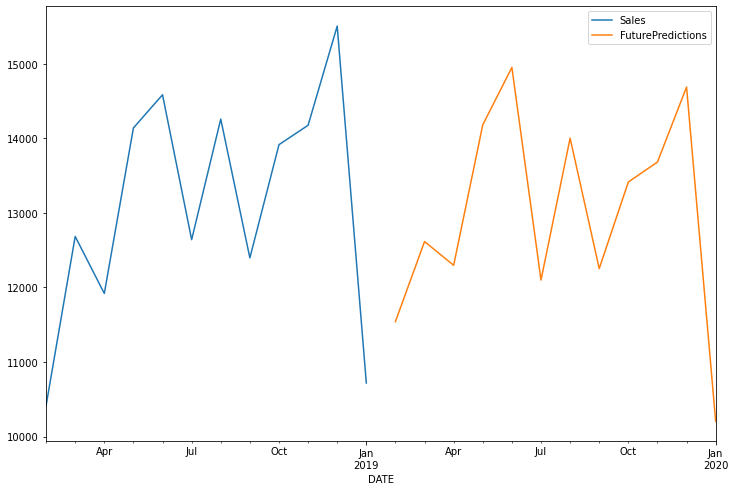

In [163]:
test["Sales"].plot(legend = True,
                   figsize = (12, 8))
FuturePred["FuturePredictions"].plot(legend = True,
                                     figsize = (12, 8))

## RNN Exercises

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [164]:
import keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import mean_squared_error

from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.preprocessing import MinMaxScaler

from keras.preprocessing.sequence import TimeseriesGenerator

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.models import load_model

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [169]:
df = pd.read_csv("./UDEMY_TSA_FINAL/Data/Miles_Traveled.csv",
                index_col = "DATE",
                parse_dates = True)
df.index.freq = "MS"
# df.columns = ["Sales"]
df.head()

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [170]:
df = df.rename(columns = {"TRFVOLUSM227NFWA": 
                     "Value"})

**TASK: Plot out the time series**

<AxesSubplot:xlabel='DATE'>

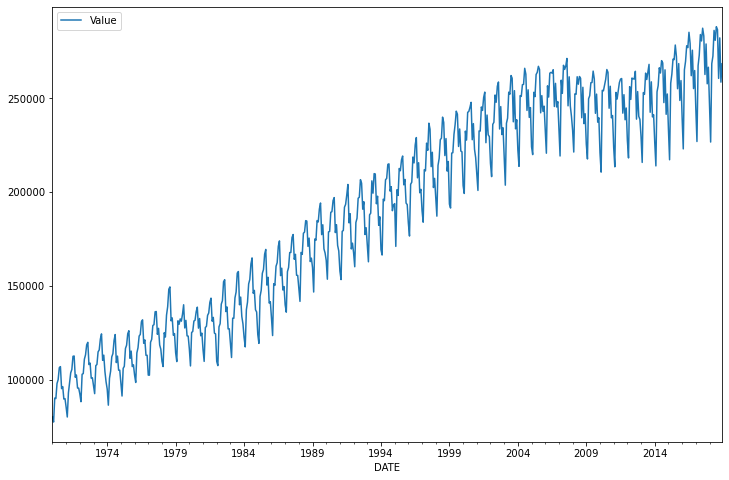

In [172]:
df.plot(figsize = (12, 8))

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

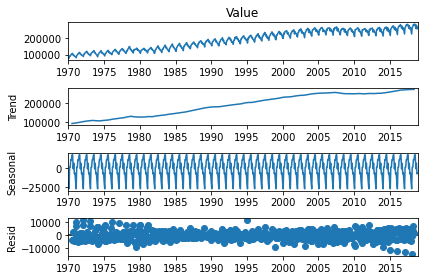

In [174]:
results = seasonal_decompose(df["Value"])
results.plot();

#### Plot of the Observed Value

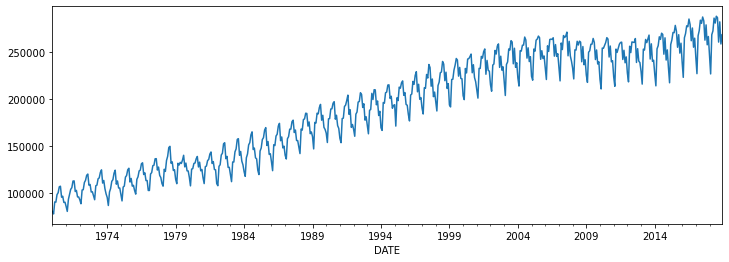

In [178]:
results.observed.plot(figsize = (12, 4));

#### Plot of the Trend

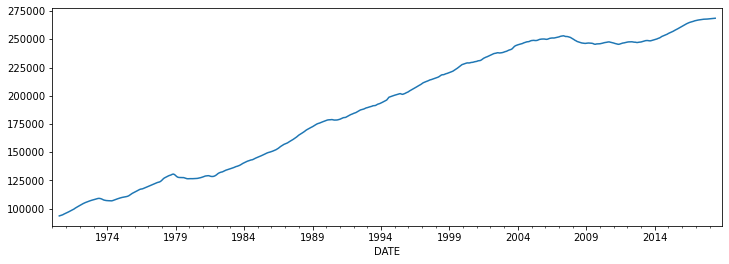

In [179]:
results.trend.plot(figsize = (12, 4));

#### Plot of the Seasonality

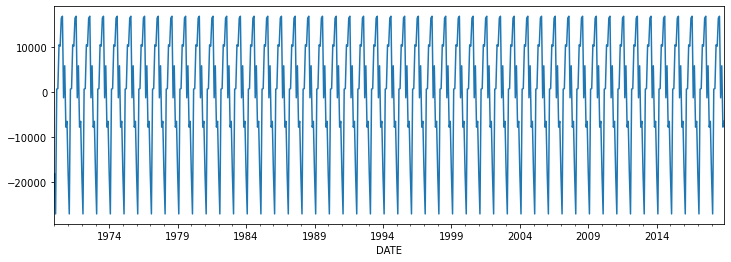

In [180]:
results.seasonal.plot(figsize = (12, 4));

#### Plot of the Error

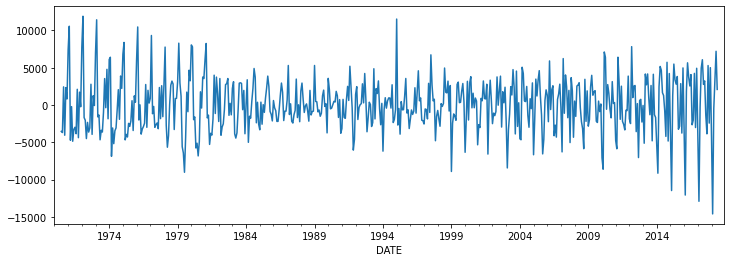

In [181]:
results.resid.plot(figsize = (12, 4));

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [183]:
len(df) - 12

576

In [184]:
train = df.iloc[:576]
test = df.iloc[576: ]

In [185]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [186]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)

scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [187]:
n_input = 12
n_features = 1
batch_size = 2
generator = TimeseriesGenerator(scaled_train, 
                                scaled_train,
                               length = n_input,
                               batch_size = batch_size )

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [188]:
model = Sequential()

model.add(LSTM(150, 
            activation = "relu",
              input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer = "adam",
             loss = "mse")

In [189]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 150)               91200     
                                                                 
 dense_6 (Dense)             (None, 1)                 151       
                                                                 
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

**TASK: Plot the history of the loss that occured during training.**

In [190]:
model.fit_generator(train_generator,
                   epochs = 100)

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_11956/4254767159.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator,


Epoch 1/100
151/151 [==============================] - 4s 10ms/step - loss: 0.0219
Epoch 2/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0085
Epoch 3/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0087
Epoch 4/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0068
Epoch 5/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0073
Epoch 6/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0067
Epoch 7/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0056
Epoch 8/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0046
Epoch 9/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0054
Epoch 10/100
151/151 [==============================] - 1s 5ms/step - loss: 0.0037
Epoch 11/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0035
Epoch 12/100
151/151 [==============================] - 1s 6ms/step - loss: 0.0025
Epoch 13/100

**TASK: Plot the history of the loss that occured during training.**

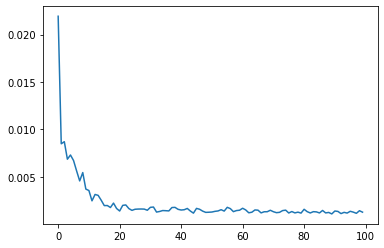

In [191]:
loss = model.history.history["loss"]
epochs = range(len(loss))

plt.plot(epochs, loss);

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [193]:
first_eval_batch = scaled_train[-12:]
first_eval_batch

first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.79630397],
        [0.71226435],
        [0.90477416],
        [0.93121043],
        [0.98386382],
        [0.96757519],
        [1.        ],
        [0.9801859 ],
        [0.8824684 ],
        [0.95995255],
        [0.85883345],
        [0.90086755]]])

**TASK: Generate predictions into the same time stamps as the test set**

In [194]:
test_predictions = []

#grabbing the last input values from the training set
first_eval_batch = scaled_train[-n_input:] 
#reshape this to the format RNN wants (same format as Timeseries Generator)
current_batch = first_eval_batch.reshape((1, n_input, n_features))

# how far into the future will I forecast?
#last n_input points from the training set
for i in range(len(test)):
    
    # One Timestep ahead of historical 12 points
    current_pred = model.predict(current_batch)[0]
    
    #store that prediction
    test_predictions.append(current_pred)
    
    #UPDATE current batch to include prediction (current_pred)
    current_batch = np.append(current_batch[:,1:,:], [[current_pred]], axis = 1)

1/1 [==============================] - 0s 32ms/step


In [195]:
test_predictions

[array([0.79682666], dtype=float32),
 array([0.7753434], dtype=float32),
 array([0.9246163], dtype=float32),
 array([0.94415027], dtype=float32),
 array([0.995598], dtype=float32),
 array([0.97915155], dtype=float32),
 array([1.014624], dtype=float32),
 array([0.98536205], dtype=float32),
 array([0.9123023], dtype=float32),
 array([0.9759373], dtype=float32),
 array([0.8727151], dtype=float32),
 array([0.9192663], dtype=float32)]

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [196]:
true_predictions = scaler.inverse_transform(test_predictions)
true_predictions

array([[244696.71289355],
       [240187.35880709],
       [271519.88120431],
       [275620.08561999],
       [286419.01961178],
       [282966.88885742],
       [290412.59213912],
       [284270.48026943],
       [268935.16827017],
       [282292.21665162],
       [260625.77546847],
       [270396.91217548]])

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [197]:
test["Predictions"] = true_predictions
test

C:\Users\CHRIST~1\AppData\Local\Temp/ipykernel_11956/1889562892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"] = true_predictions


,Value,Predictions
DATE,,
2018-01-01,245695.0,244696.712894
2018-02-01,226660.0,240187.358807
2018-03-01,268480.0,271519.881204
2018-04-01,272475.0,275620.085620
2018-05-01,286164.0,286419.019612
2018-06-01,280877.0,282966.888857
2018-07-01,288145.0,290412.592139
2018-08-01,286608.0,284270.480269
2018-09-01,260595.0,268935.168270


**TASK: Plot out the test set against your own predicted values.**

<AxesSubplot:xlabel='DATE'>

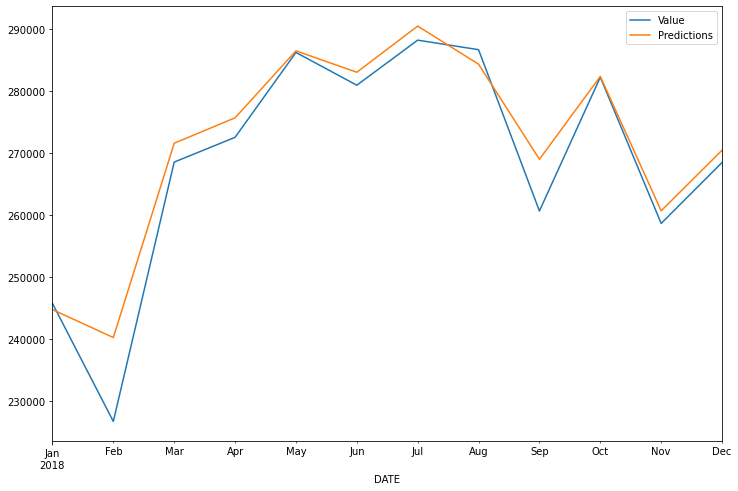

In [198]:
test.plot(legend = True, figsize = (12, 8))

# Saving Models

**TASK: Optional, Save your model!**

In [199]:
model.save("RNNModel_Forecasting_Exercise.h5")